In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM as RBM


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [16]:
rbm = RBM(n_components = 1000)


In [17]:
# generate 3D binary features

# rare morph case

train_dat = np.concatenate((.1*np.random.rand(10000,3),.1*np.random.rand(10000,3)+.8),axis=0)
print(train_dat.shape)

train_dat = train_dat[np.random.permutation(train_dat.shape[0]),:]
train_order = np.argsort(train_dat[:,0])

(20000, 3)


In [18]:
# fit rbm

Y = rbm.fit_transform(train_dat)

In [19]:
print(Y.shape)

(20000, 1000)


In [20]:
# Y_ = Y[train_order,:]
# Y=Y[train_order,:]/np.linalg.norm(Y[train_order,:],2,axis=1)[:,np.newaxis]
# S = np.matmul(Y,Y.T)
# f,ax = plt.subplots()
# ax.imshow(S)

In [21]:
test_data = .2*np.random.rand(1000,3)
for m in [.2,.4,.6,.8]:
    test_data = np.concatenate((test_data,m+.2*np.random.rand(1000,3)))
    
col0_sort = np.argsort(test_data[:,0],axis=0)
test_data=test_data[col0_sort,:]

In [22]:
Y_test = rbm.transform(test_data)

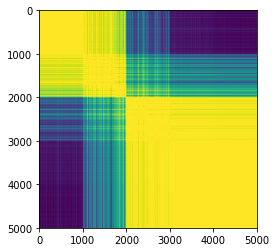

In [23]:
Y_test_ = Y_test/np.linalg.norm(Y_test,2,axis=1)[:,np.newaxis]
S_test = np.matmul(Y_test_,Y_test_.T)
f,ax = plt.subplots()
ax.imshow(S_test) #,vmin=0.9,vmax=1)
f.savefig("G:\\My Drive\\Figures\\TwoTower\\RBM\\RareMorph_Eg.png",format = 'png')

In [25]:
# familiar morph
Y_test = rbm.fit_transform(test_data)

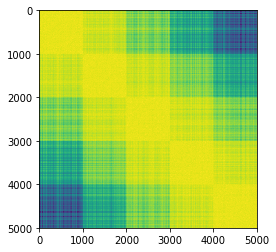

In [26]:
Y_test_ = Y_test/np.linalg.norm(Y_test,2,axis=1)[:,np.newaxis]
S_test = np.matmul(Y_test_,Y_test_.T)
f,ax = plt.subplots()
ax.imshow(S_test) #,vmin=0.9,vmax=1)
f.savefig("G:\\My Drive\\Figures\\TwoTower\\RBM\\FamMorph_Eg.png",format='png')